<a href="https://colab.research.google.com/github/Ahmad3752/Colab/blob/main/Machine_Learning_lab_3(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/student_data.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


ACTUALLY IN THIS TASK I AM NOT USING TRAIN TEST SPLIT AS I AM DOING THROUGH FEATURE ENGEENRING AS I FIND ITS VISUALIZATION MORE INTERSETING USING THE WHOLE DATA . IN  THE SECOND TASK I'LL USE IT

In [2]:
df.isna().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


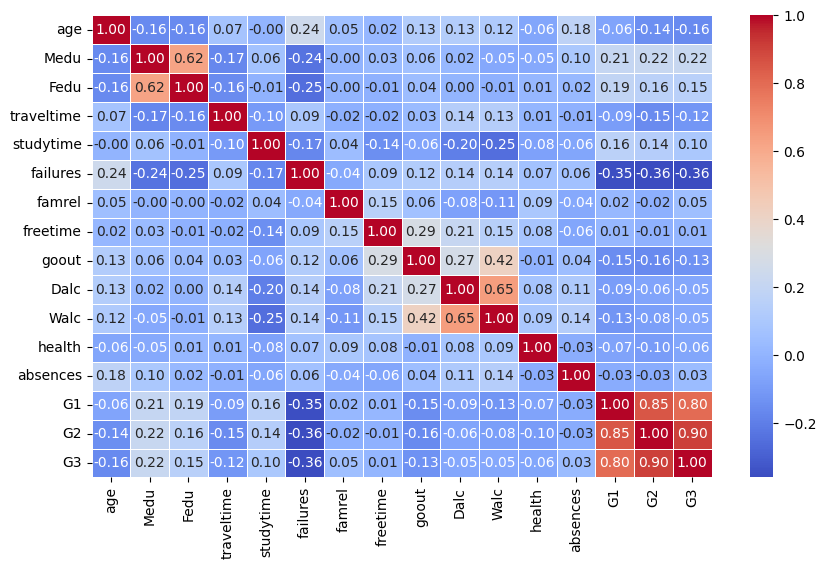

In [3]:
corr = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5);


SIMPLE LINEAR REGRESSION
Working on G1 and G2
FIRST CHECKING FOR OUTLIERS


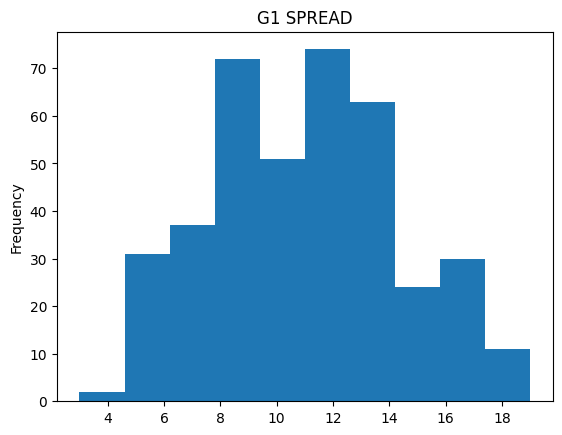

In [10]:
df['G1'].plot(kind='hist')
plt.title('G1 SPREAD');

Text(0.5, 1.0, 'G2 SPREAD')

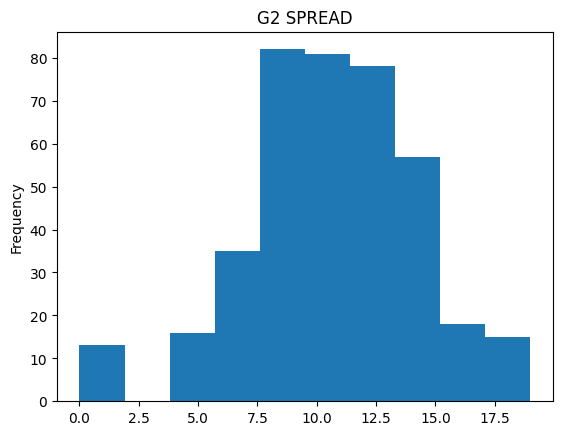

In [11]:
df['G2'].plot(kind='hist')
plt.title('G2 SPREAD')

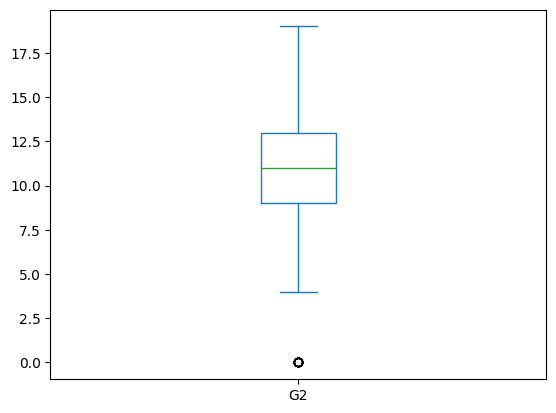

In [36]:
df['G2'].plot(kind='box');

G2 contains outliers so removing it using quantiles
Actually by removing this outliers their has been a significant improvement in my mse and mae

<Axes: >

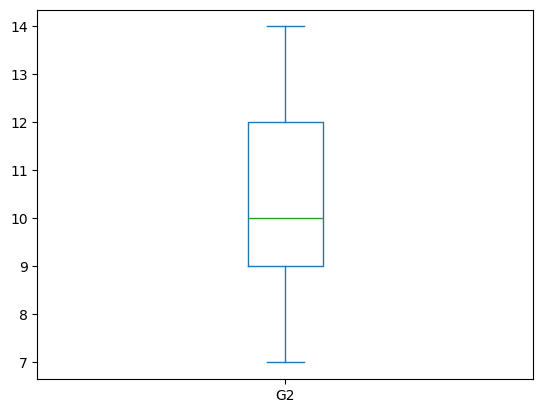

In [44]:
low, high = df["G2"].quantile([0.1, 0.9])
mask_area = df["G2"].between(low, high)
df = df[mask_area]
df['G2'].plot(kind='box')

<Axes: xlabel='G1', ylabel='G2'>

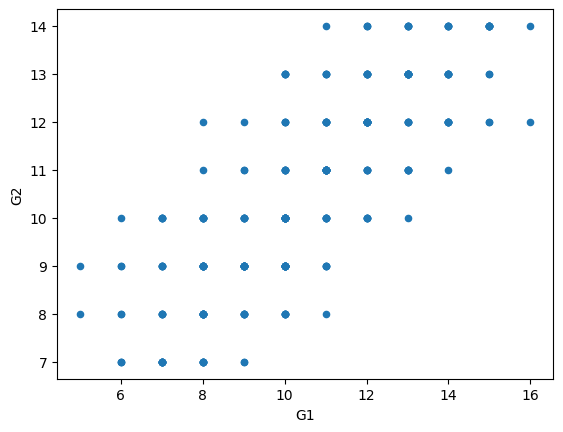

In [63]:
df.plot(kind='scatter',x='G1',y='G2')

In [64]:
features=['G1']
target='G2'
X_train=df[features]
y_train=df[target]
y_train.shape

(285,)

In [65]:
y_mean=y_train.mean()
y_mean

10.501754385964912

In [66]:
y_baseline=[y_mean]*len(y_train)


  The baseline prediction is

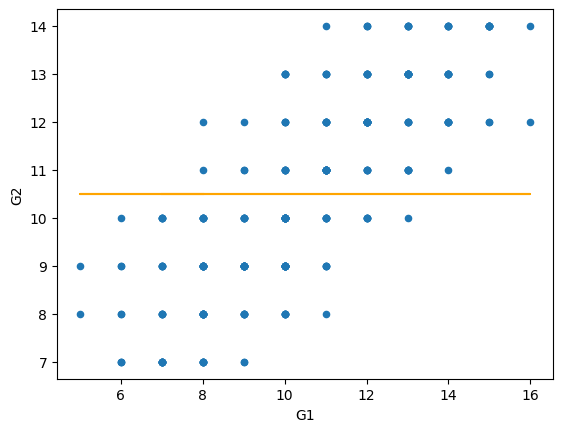

In [49]:
df.plot(kind='scatter',x='G1',y='G2')
plt.plot(X_train.values,y_baseline,color='orange',label='Baseline Model');

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_baseline = mean_absolute_error(y_train, y_baseline)

mse_baseline = mean_squared_error(y_train, y_baseline)

print("Mean apt price:", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))
print("Baseline MSE:", round(mse_baseline, 2))


Mean apt price: 10.5
Baseline MAE: 1.77
Baseline MSE: 4.19


In [51]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()


In [52]:
model.fit(X_train,y_train)

LinearRegression()

In [53]:
y_pred=model.predict(X_train)

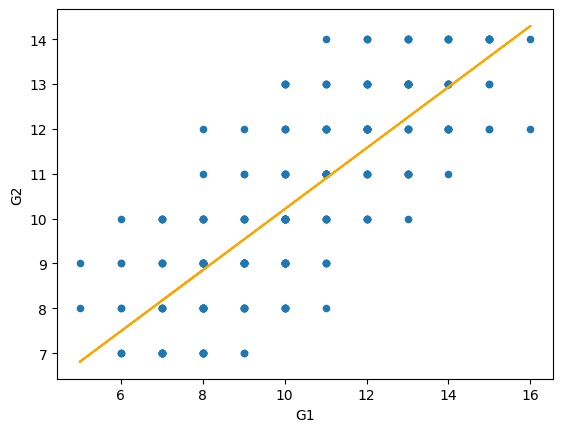

In [54]:
df.plot(kind='scatter',x='G1',y='G2')
plt.plot(X_train.values,y_pred,color='orange',label='Baseline Model');

In [55]:
mae_baseline = mean_absolute_error(y_train, y_pred)

mse_baseline = mean_squared_error(y_train, y_pred)

print("Mean apt price:", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))
print("Baseline MSE:", round(mse_baseline, 2))

Mean apt price: 10.5
Baseline MAE: 1.0
Baseline MSE: 1.52


////////*************************************//////////////////
TASK2
MULTIPLE LINEAR REGRESSION
INPUT FEATURES=G1,FAILURES
TARGET='G2

<Axes: >

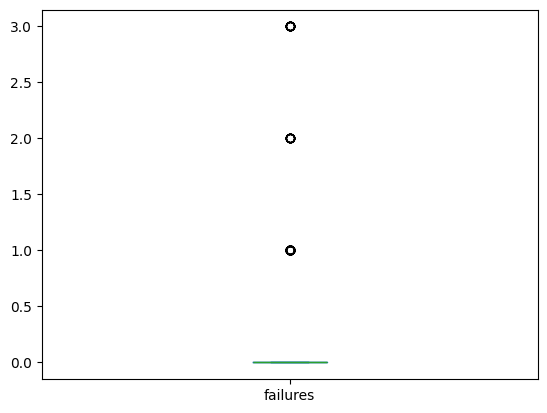

In [72]:
df['failures'].plot(kind='box')

<Axes: >

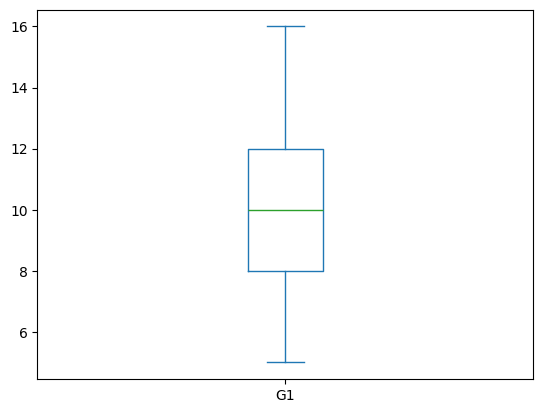

In [73]:
df['G1'].plot(kind='box')

I'LL be using standard scalar as the g1 columns is ranging from 5-16 while failure from 0-3

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [79]:
features=['G1','failures']
target='G2'
X=df[features]
y=df[target]
y.shape

(285,)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
print(X_train.shape)
print(y_train.shape)

(228, 2)
(228,)


In [96]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])


In [97]:
model.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [98]:
y_pred=model.predict(X_train)

In [99]:
mae_baseline = mean_absolute_error(y_train, y_pred)

mse_baseline = mean_squared_error(y_train, y_pred)

print("Baseline MAE:", round(mae_baseline, 2))
print("Baseline MSE:", round(mse_baseline, 2))

Baseline MAE: 0.95
Baseline MSE: 1.44


In [100]:
y_pred_test=model.predict(X_test)

In [101]:
mae_baseline = mean_absolute_error(y_test, y_pred_test)

mse_baseline = mean_squared_error(y_test, y_pred_test)

print("Baseline MAE:", round(mae_baseline, 2))
print("Baseline MSE:", round(mse_baseline, 2))

Baseline MAE: 1.11
Baseline MSE: 1.69


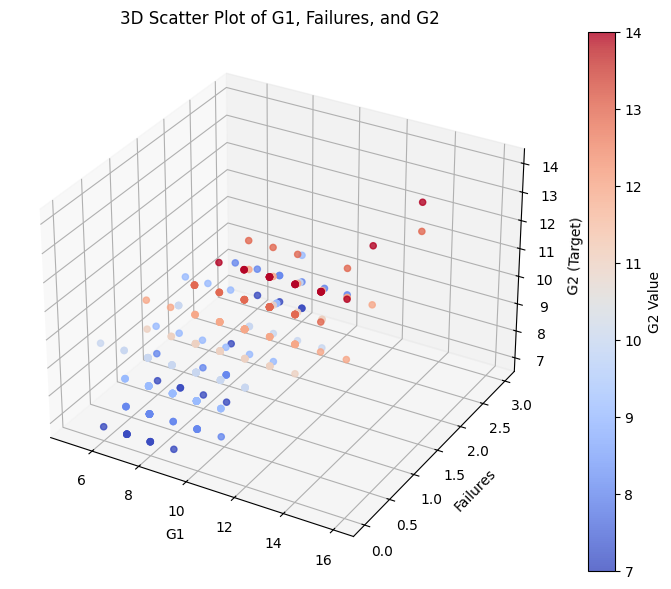

In [103]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(X['G1'], X['failures'], y, c=y, cmap='coolwarm', marker='o', alpha=0.8)

ax.set_xlabel('G1')
ax.set_ylabel('Failures')
ax.set_zlabel('G2 (Target)')
ax.set_title('3D Scatter Plot of G1, Failures, and G2')

cbar = plt.colorbar(sc)
cbar.set_label('G2 Value')

plt.show()